In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn import datasets, ensemble
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Loading the train and test sets

data=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [ ]:
#Exploratory data analysis(EDA) on the train set


#data['Unit'].unique()
cat = data.select_dtypes(include=['O'])
cat.apply(pd.Series.nunique)
test.isnull().sum()
#data['VAR3'].value_counts()
#data['Pay_Scale'].mean()
#data.isnull().sum()

In [ ]:
#Filling missing values in training data using mean/mode

data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Time_of_service'].fillna(data['Time_of_service'].mean(),inplace=True)
data['Work_Life_balance'].fillna(data['Work_Life_balance'].mean(),inplace=True)
data['VAR2'].fillna(data['VAR2'].mean(),inplace=True)
data['VAR4'].fillna(data['VAR4'].value_counts().idxmax(),inplace=True)
data['Pay_Scale'].fillna(data['Pay_Scale'].mean(),inplace=True)
data.isnull().sum()

In [ ]:
data['Age'].fillna(data['Age'].mode().iloc[0],inplace=True)
data['Time_of_service'].fillna(data['Time_of_service'].mode().iloc[0],inplace=True)
data['Work_Life_balance'].fillna(data['Work_Life_balance'].mode().iloc[0],inplace=True)
data['VAR2'].fillna(data['VAR2'].mode().iloc[0],inplace=True)
data['VAR4'].fillna(data['VAR4'].value_counts().idxmax(),inplace=True)
data['Pay_Scale'].fillna(data['Pay_Scale'].mode().iloc[0],inplace=True)
#data.isnull().sum()

In [ ]:
#Filling missing values in the test data

test['Age'].fillna(test['Age'].mode().iloc[0],inplace=True)
test['Time_of_service'].fillna(test['Time_of_service'].mode().iloc[0],inplace=True)
test['Work_Life_balance'].fillna(test['Work_Life_balance'].mode().iloc[0],inplace=True)
test['VAR2'].fillna(test['VAR2'].mode().iloc[0],inplace=True)
test['VAR4'].fillna(test['VAR4'].value_counts().idxmax(),inplace=True)
test['Pay_Scale'].fillna(test['Pay_Scale'].mode().iloc[0],inplace=True)

In [ ]:
#Using label encoder for categorical variables

for x in data.columns:
    if data[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[x].values))
        data[x] = lbl.transform(list(data[x].values))
#data.isnull().sum()


for x in test.columns:
    if(x=='Employee_ID') :
        continue
    if test[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(test[x].values))
        test[x] = lbl.transform(list(test[x].values))
#test.isnull().sum()

In [ ]:
#Using One-hot encoding(OHE) for categorical variables

data=pd.get_dummies(data, columns=["Gender", "Relationship_Status","Hometown","Unit","Decision_skill_possess","Compensation_and_Benefits"], prefix=["gen", "Rel","Town","Unit","Skill","C&B"])
test=pd.get_dummies(test, columns=["Gender", "Relationship_Status","Hometown","Unit","Decision_skill_possess","Compensation_and_Benefits"], prefix=["gen", "Rel","Town","Unit","Skill","C&B"])

In [ ]:
#Creating train and test data 

X=data.loc[:,list(data.columns[1:23])]
#+list(data.columns[18:48])
Y=data.iloc[:,23]

#Test data size is 0.5% since the actual testing is done by Hacker Earth
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.005, random_state = 0,shuffle=True) 

In [ ]:
Xtest=test.iloc[:,1:23]
Xtest

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,0,32.0,5,1,3,9,2,7.0,4,30,1,5,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,1,65.0,2,1,2,2,3,41.0,2,72,1,1,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,1,52.0,3,0,3,10,3,21.0,3,25,0,1,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,1,50.0,5,1,4,4,0,11.0,4,28,1,1,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,0,44.0,3,0,1,9,2,12.0,4,47,1,3,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,32.0,3,1,1,10,3,3.0,3,38,1,3,6.0,2,2.0,1,-0.1048,0.7075,1.0,4,7,4
2996,0,22.0,2,1,1,4,2,10.0,2,57,1,4,9.0,2,1.0,3,0.7516,0.7075,3.0,4,8,3
2997,0,60.0,4,1,2,3,0,35.0,1,69,0,2,9.0,3,3.0,3,-1.8176,-0.4537,2.0,4,8,4
2998,0,51.0,1,0,3,2,1,23.0,1,30,0,2,6.0,3,1.0,5,0.7516,-0.4537,2.0,3,9,2


In [ ]:
#Using various feature selection techniques to get the features which give the maximum information

fs = SelectKBest(score_func=mutual_info_regression, k= 'all')
fs.fit(X_train,Y_train)
fs.scores_
X_train_fs=fs.transform(X_train)
Xtest_fs=fs.transform(Xtest)
X_test_fs=fs.transform(X_test)
fs.scores_

array([0.00172403, 0.0136035 , 0.        , 0.        , 0.00714683,
       0.00120465, 0.00521746, 0.        , 0.00436587, 0.01106973,
       0.        , 0.        , 0.00610226, 0.        , 0.        ,
       0.        , 0.01143245, 0.00877802, 0.        , 0.00072529,
       0.00254051, 0.        ])

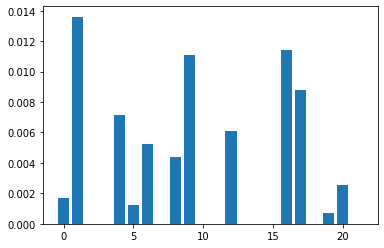

In [ ]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Using various regression algorithms and hyperparameter tuning to get the best results

In [ ]:

reg =  LinearRegression().fit(X_train_fs, Y_train)
reg.score(X_test_fs,Y_test)
Y_pred=reg.predict(Xtest_fs)
#score_train = mean_absolute_error(Y_test,Y_pred)
#score_train

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X_train_fs, Y_train)
regr.score(X_test_fs,Y_test)
Y_pred=regr.predict(Xtest_fs)
#score_train = mean_absolute_error(Y_test,Y_pred)
#score_train

In [ ]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=10000, tol=1e-3))
reg.fit(X_train_fs, Y_train)
reg.score(X_test_fs,Y_test)
Y_pred=reg.predict(Xtest_fs)
#score_train = mean_squared_error(Y_test,Y_pred)
#score_train

In [ ]:
regr = PassiveAggressiveRegressor(max_iter=100, random_state=0,tol=1e-3)
regr.fit(X_train_fs, Y_train)
regr.score(X_test_fs,Y_test)
Y_pred=regr.predict(Xtest_fs)
#score_train = mean_squared_error(Y_test,Y_pred)
#score_train

In [ ]:
regr = GradientBoostingRegressor(random_state=0)
regr.fit(X_train_fs, Y_train)
regr.score(X_test_fs,Y_test)
Y_pred=regr.predict(Xtest_fs)

In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train, Y_train)
selector.support_


array([ True, False,  True, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True, False, False, False])

In [ ]:
print(selector.ranking_)
print(selector.score(X_train,Y_train))
Y_pred=selector.predict(X_test)
score_train = mean_squared_error(Y_test,Y_pred)
score_train

In [ ]:
#Creating final csv file with the test data and the predictions

final_ans=test.iloc[:,0]
final_ans=pd.DataFrame(final_ans)
final_ans.insert(1,"Attrition_rate",Y_pred)
final_ans.to_csv('ouputAllColumns.csv')

In [ ]:
final_ans[final_ans.Attrition_rate>0.18]
Y_pred[Y_pred>0.16].shape

(3000,)